<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# HR Analytics

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Exploratory Analysis](#section3)
    - 3.1 [Visualising the distribution](#section301)<br>
        - 3.1.1 [Visualising the distribution](#section3011)<br>
        - 3.1.2 [Visualising the distribution](#section3012)<br>
        - 3.1.3 [Visualising the distribution](#section3014)<br>
        - 3.1.4 [Visualising the distribution](#section3014)<br>
        - 3.1.5 [Visualising the distribution](#section3015)<br>
    - 3.2 [Encode all categorical variables](#section302)<br>
    - 3.3 [Transform Data using MinMaxScaler](#section303)<br>        
4. [Model Building](#section4)<br>
    - 4.1 [Models with defaults](#section401)<br>
    - 4.2 [Models with GridSearchCV](#section402)<br>
    - 4.3 [Models with SMOTE](#section403)<br>
    - 4.4 [Models with SMOTE & GridSearchCV](#section404)<br>
    - 4.5 [Models with UnderSampling](#section404)<br>
    - 4.6 [Models with UnderSampling & GridsearchCV](#section405)<br>
5. [Conclusion](#section5)<br>

<a id=section1></a>
### 1. Problem Statement

My client is a large MNC and they have 9 broad verticals across the organisation. One of the problem my client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

<a id=section2></a>
### 2. Data loading and description

- Dataset is got from analytics-hackathon-2018
- The dataset consists of the information about employee and related information on trainings, rating, KPI, awards etc.,
- Below is a table showing names of all the columns and their description.

| Column Name          | Description                                                                                   |
| -------------        |:-------------                                                                                :| 
| employee_id	       | Unique ID for employee                                                                        | 
| department	       | Department of employee                                                                        |  
| region               | Region of employment (unordered)                                                              | 
| education            | Education Level                                                                               |   
| gender               | Gender of employee                                                                            |
| recruitment_channel  | Channel of recruitment for employee                                                           |
| no_of_trainings	   | no of other trainings completed in previous year on soft skills, technical skills etc.        |
| age                  | Age of employee                                                                               |
| previous_year_rating | Employee Rating for the previous year                                                         |
| length_of_service    | Length of service in years                                                                    |
| KPIs_met >80%        | if Percent of KPIs(Key performance Indicators) >80% then 1 else 0                             |
| awards_won?          | if awards won during previous year then 1 else 0                                              |
| avg_training_score   | Average score in current training evaluations                                                 |
| is_promoted          | (Target) Recommended for promotion                                                            |         

#### Import packages & libraries

In [0]:
#!pip install category_encoders
#!pip install scikit-plot
#!pip install jupyterlab-plotly-extension

In [0]:
import pandas as pd             # For data manipulation and analysis
import pandas_profiling
import numpy as np              # Implemennts milti-dimensional array and matrices
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # Plotting library for Python programming language and it's numerical mathematics extension NumPy
from sklearn import metrics
%matplotlib inline              
# allow plots to appear directly in the notebook
#MLA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

#Perform Cross Validation for DTRee, Random Forrest, Logistic and KNN
from sklearn.tree import DecisionTreeClassifier        #D.Tree
from sklearn.ensemble import RandomForestClassifier    #Forest
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier     #KNN 
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm             import SVC                       #SVC (Classification)

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.model_selection import StratifiedKFold
#import category_encoders      as ce

import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [269]:
dataSrc = '/content/sample_data/hr_data_train.csv' 
df_hr = pd.read_csv(dataSrc,delimiter=",")
print("Reading hr data completed ..")

Reading hr data completed ..


<a id=section3></a>
### 3. Exploratory Data Analysis

In [270]:
pd.set_option('display.max_columns',None)
df_hr.shape
df_hr.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [0]:
## change the names of KPI and Awards won, making it easier to read for better names
df_hr.rename(columns={"KPIs_met >80%":"KPI"},inplace=True)
df_hr.rename(columns={"awards_won?":"awards_won"},inplace=True)

In [272]:
df_hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Deal with __Missing__ Values

In [273]:
print("Total missing data=",df_hr.isnull().sum().sum())
df_hr.isnull().sum()

Total missing data= 6533


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPI                        0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

Only missing values in education and prev year rating

In [274]:
#Create DS by replacing missing data 
print(df_hr.previous_year_rating.unique())
print(df_hr.education.unique())

#find avg of prev rating group by promotion
noprom_prevrat_mean = df_hr.groupby('is_promoted')['previous_year_rating'].mean()[0]
print("Not Promoted Mean=",noprom_prevrat_mean)
prom_prevrat_mean    = df_hr.groupby('is_promoted')['previous_year_rating'].mean()[1]
print("Promoted Mean=",prom_prevrat_mean)

#find mode of education group by promotion
noprom_edu_mode = df_hr[df_hr['is_promoted']==0]['education'].mode()
print("Not Promoted Mode=",noprom_edu_mode.values[0])
prom_edu_mode = df_hr[df_hr['is_promoted']==1]['education'].mode()
print("Promoted Mode=",prom_edu_mode.values[0])

df_hr_frp=df_hr.copy()

#Fill previous rating with mean prev ratings group by promotion
df_hr_frp['previous_year_rating'] = df_hr_frp.groupby(['is_promoted'])['previous_year_rating'].apply(lambda x: x.fillna(x.mean()))

#Fill the NaN values with Mode values of education
df_hr_frp['education'] = df_hr_frp.groupby(['is_promoted'])['education'].apply(lambda x: x.fillna(x.mode().values[0]))

print("Now, Total missing data=",df_hr_frp.isnull().sum().sum())

[ 5.  3.  1.  4. nan  2.]
["Master's & above" "Bachelor's" nan 'Below Secondary']
Not Promoted Mean= 3.267910689246036
Promoted Mean= 3.986139986139986
Not Promoted Mode= Bachelor's
Promoted Mode= Bachelor's
Now, Total missing data= 0


__Notice,__ There are no more missing values<br>
Filled previous rating with __mean prev ratings__ 
and education with __mode__ value of education - group by promotion<br>

__Let's take a look at how many unique values does it have__

In [0]:
df_hr_frp.set_index("employee_id", inplace = True)

In [276]:
df_hr_frp.apply(lambda x: len(x.unique())) 

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     7
length_of_service       35
KPI                      2
awards_won               2
avg_training_score      61
is_promoted              2
dtype: int64

__Quickly describe what are those parameters:__

- KPI - KPI is met > 80% - A boolean value telling us whether or not a given employee has met the KPI
- age - Age of a given employee
- avg_training_score - The average training score
- awards_won - boolean value, it has won or not
- department - 9 different departaments, categorical column
- education - categorical column
- gender - gonna change this categorical categorie, 0 female / 1 men
- is_promoted - boolean value, has it got a promotion or not?
- length_of_service - amount of time working for the company
- no_of_trainings - number of trainings
- previous_year_rating - rating given in the previous year, the higher the better
- recruitment_channel - categorical category
- region - different regions in this company

__Gender categorie and Education is easily mapped into numerical ones, let's do it:__

In [0]:
#mapping gender
df_hr_frp['gender'] = df_hr_frp['gender'].map( {'f': 0, 'm': 1} ).astype(int) 

In [278]:
df_hr_frp.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [0]:
#same thing for the education categorie, mapping it into 3 different categories
df_hr_frp['education'] = df_hr_frp['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)

In [280]:
df_hr_frp.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [0]:
#same thing for the education categorie, mapping it into 3 different categories
df_hr_frp['recruitment_channel'] = df_hr_frp['recruitment_channel'].map( {'sourcing': 0, 'referred': 1, 'other': 2} ).astype(int)

In [282]:
df_hr_frp.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,2,0,0,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,1,1,2,1,30,5.0,4,0,0,60,0


Let us segregate numeric and object features

In [283]:
#Separate numeric and object features
df_hr_frp_objects = df_hr_frp.select_dtypes(include=['object']).copy()
df_hr_frp_numeric = df_hr_frp.select_dtypes(exclude=['object']).copy()
df_hr_frp_numeric.head(2)

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,
65438,2,0,0,1,35,5.0,8,1,0,49,0
65141,1,1,2,1,30,5.0,4,0,0,60,0


In [284]:
df_hr_frp_objects.head(2)

,department,region
employee_id,,
65438,Sales & Marketing,region_7
65141,Operations,region_22


<a id=section301></a>
__3.1 Let's start by visualising the distribution of each columns.__<br>

<a id=section3011></a>
__3.1.1 Target Rate__

Class as Bar and Pie chart:


Text(0, 0.5, '')

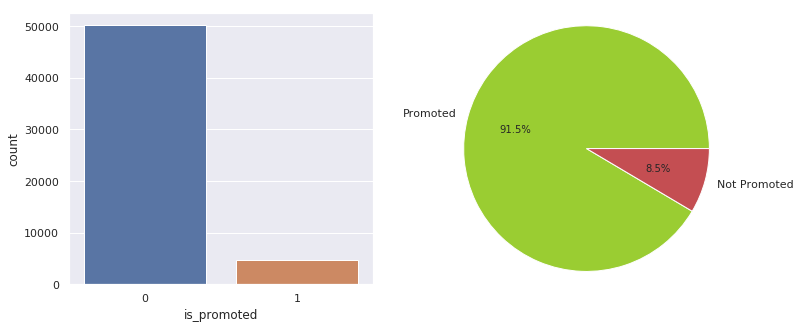

In [285]:
# Check Class variables that has 0 value for not promoted and 1 for promoted
target = 'is_promoted'
print("Class as Bar and Pie chart:")
fig, ax = plt.subplots(1, 2,figsize=(12,5))

ax[0] = sns.countplot(x=target, data=df_hr_frp,ax=ax[0])

ax[1].pie(df_hr_frp_numeric.is_promoted.value_counts(),autopct='%1.1f%%', labels=['Promoted','Not Promoted'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

__Note__, The dataset is slightly imbalance, where it is having only 8.5% of category-Not Promoted

<a id=section3012></a>
__3.1.2 Distribution of Numerical features__

In [0]:
#df_hr_frp = df_hr_frp.drop(['employee_id','recruitment_channel','no_of_trainings','gender','length_of_service','region'],axis=1)
#df_hr_frp = df_hr_frp.drop(['employee_id'],axis=1)
#df_hr_frp.head(1)

In [287]:
df_hr_frp_numeric.isnull().sum().sum()

0

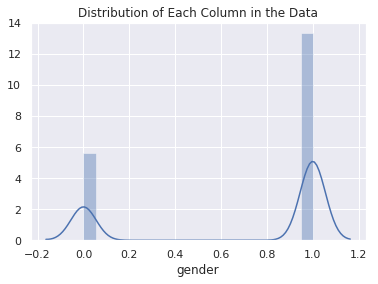

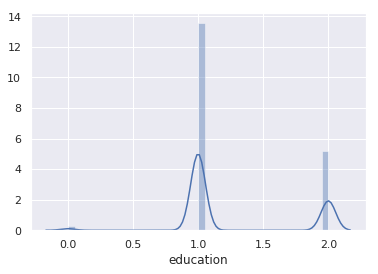

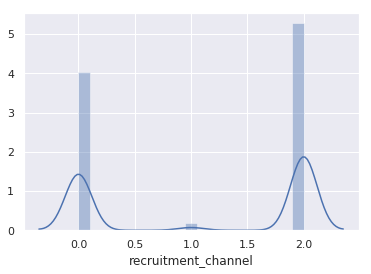

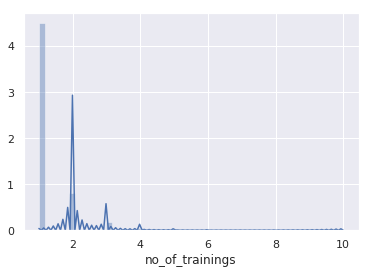

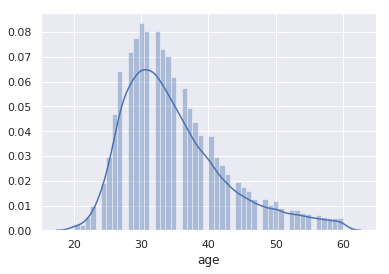

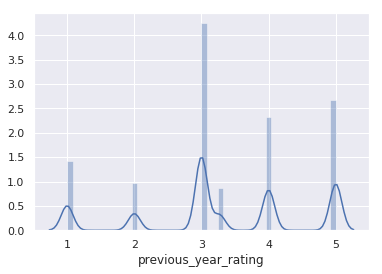

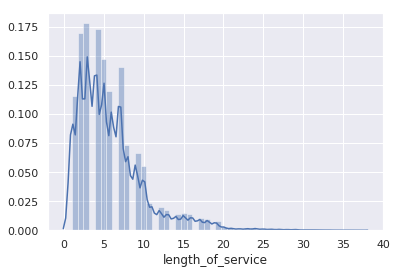

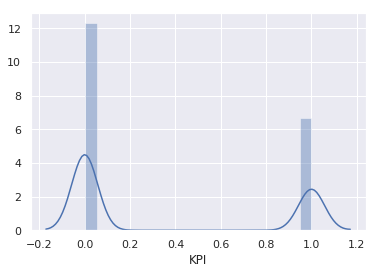

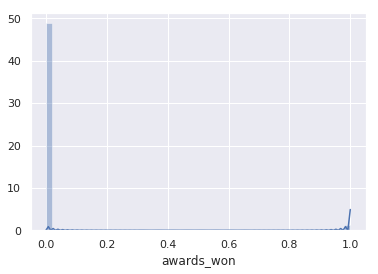

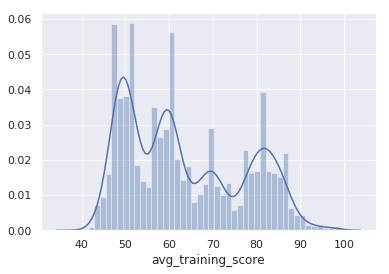

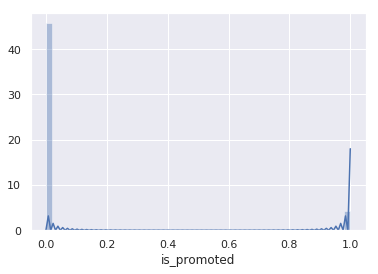

In [288]:
sns.set_style('darkgrid')
plt.title('Distribution of Each Column in the Data')

for i,col in enumerate(df_hr_frp_numeric.columns):
    plt.figure(i)
    #if col != 'previous_year_rating':
    sns.distplot(df_hr_frp_numeric[col])

__Distribution of,__ Age is slightly skewed to the right and also Length of service is right-skewed

Text(0.5, 1.0, 'Age distribution')

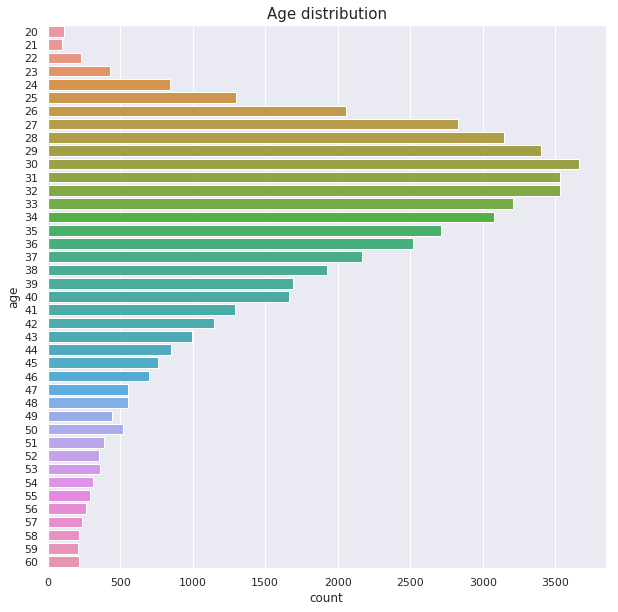

In [289]:
sns.set(rc={'figure.figsize':(10,10)}) #setting the size of the figure to make it easier to read.
sns.countplot(y=df_hr_frp_numeric["age"]).set_title("Age distribution", fontsize=15) #plotting it horizontally to make it easier to read

__The age distribution is slighlty right skewed distribution, the peak of the distribution is 30 years__<br>
it would be a good idea to map age and create 4 differente values for it, according to the distribution above:<br>
<=26 : 0 , > 27 < 35 : 1 , > 35 < 50, > 50

In [0]:
df_hr_frp_numeric.loc[df_hr_frp_numeric['age'] <= 26, 'age'] = 0
df_hr_frp_numeric.loc[(df_hr_frp_numeric['age'] > 26) & (df_hr_frp_numeric['age'] <= 35), 'age'] = 1
df_hr_frp_numeric.loc[(df_hr_frp_numeric['age'] > 35) & (df_hr_frp_numeric['age'] <= 50), 'age'] = 2
df_hr_frp_numeric.loc[df_hr_frp_numeric['age'] > 50, 'age'] = 3

Text(0.5, 1.0, 'Distribution of age after mapping')

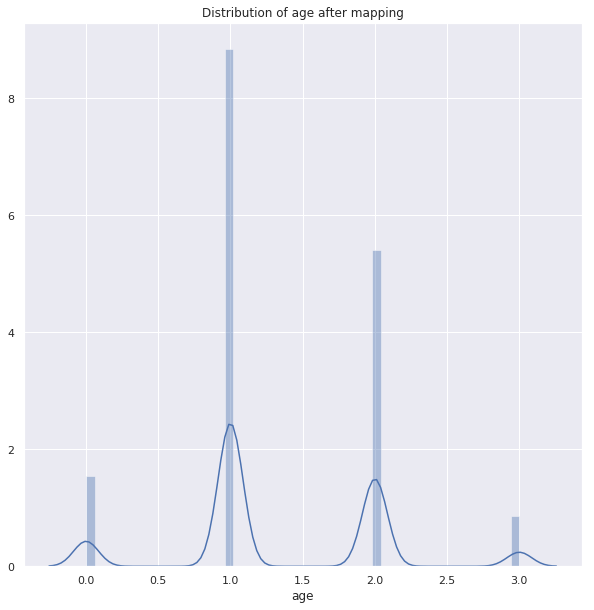

In [291]:
sns.distplot(df_hr_frp_numeric["age"]).set_title("Distribution of age after mapping")

<a id=section3013></a>
__3.1.3 Distribution of Categorical features__

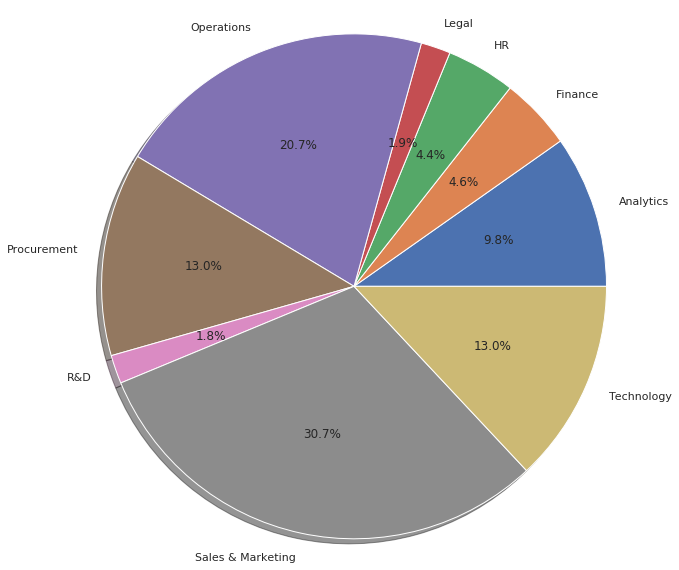

In [292]:
labels = df_hr_frp_objects['department'].astype('category').cat.categories.tolist()
counts = df_hr_frp_objects['department'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

Text(0.5, 1.0, 'Departament distribution')

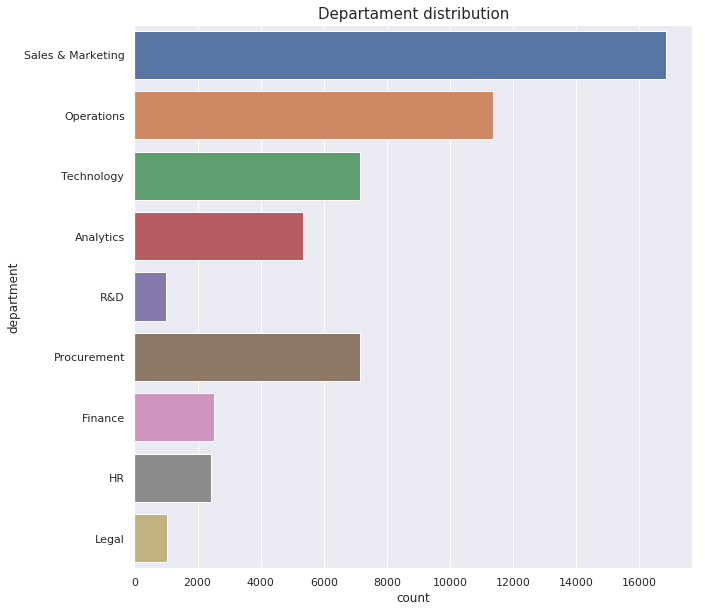

In [293]:
sns.set(rc={'figure.figsize':(10,10)}) #setting the size of the figure to make it easier to read.
sns.countplot(y=df_hr_frp_objects["department"]).set_title("Departament distribution", fontsize=15) #plotting it horizontally to make it easier to read

In [294]:
df_hr_frp.head(1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,2,0,0,1,35,5.0,8,1,0,49,0


<a id=section3014></a>
__3.1.4 Features vs. Promotion rate__

Text(0.5, 1.0, 'Promotion By recruitment_channel')

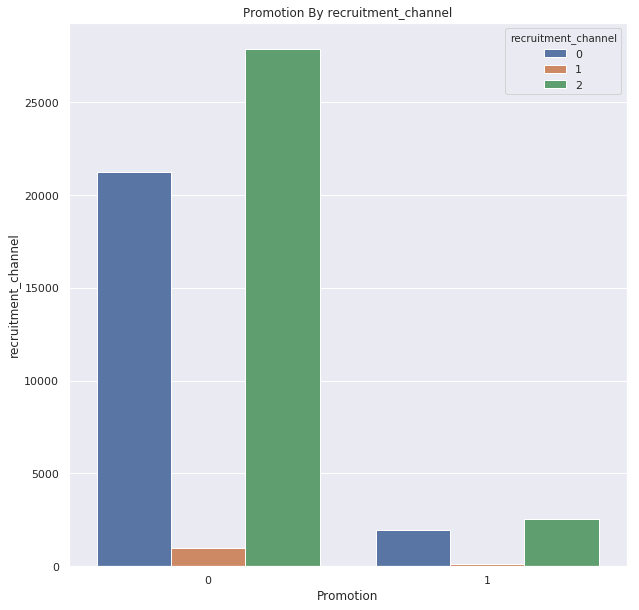

In [295]:
ax=sns.countplot(x=df_hr_frp.is_promoted,hue=df_hr_frp.recruitment_channel,data=df_hr_frp)
ax.set_ylabel('recruitment_channel')
ax.set_xlabel('Promotion')

ax.set_title('Promotion By recruitment_channel')

In [0]:
# ax=sns.countplot(x=df_hr_frp.is_promoted,hue=df_hr_frp.KPI,data=df_hr_frp)
# ax.set_ylabel('KPI')
# ax.set_xlabel('Promotion')

# ax.set_title('Promotion By KPI')

<a id=section3015></a>
__3.1.5 Correlation Heatmap__

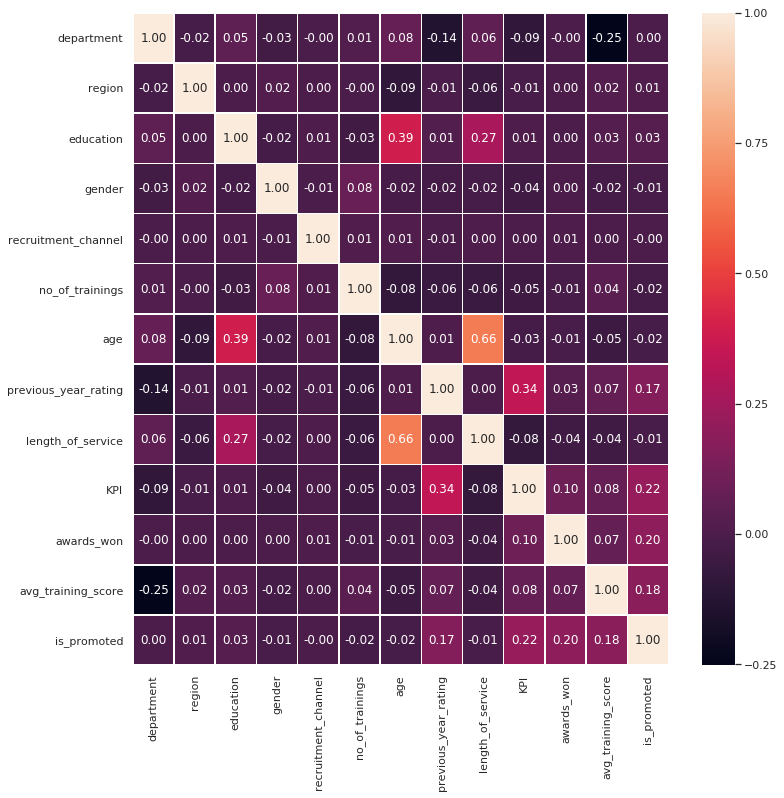

In [297]:
for cols in ["department","region","education","recruitment_channel","gender"]:
    df_hr_frp[cols] = df_hr_frp[cols].astype('category')
    df_hr_frp[cols] = df_hr_frp[cols].cat.codes
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_hr_frp.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

We see again from the correlation heatmap that almost all the variables are not directly correlated with promotion rate. <br>The variables with the highest correlation (0.22 and 0.20 respectively) is whether the KPI is met and whether an award was won.

<a id=section302></a>
__3.2 Encode all categorical variables__


In [298]:
obj_col_names = df_hr_frp_objects.columns.values
for item in obj_col_names:
    print(item,': ',df_hr_frp_objects[item].unique())   

department :  ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region :  ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']


There are a no columns that can be converted to binary.

In [299]:
#df_hr_frp_objects = pd.get_dummies(df_hr_frp_objects, columns=obj_col_names, prefix=["Dept", "Education"], drop_first=True)
# df_hr_frp_objects = pd.get_dummies(df_hr_frp_objects, columns=obj_col_names, drop_first=True)
# df_hr_frp_objects.head(1)
# use an encoder for object columns to convert to numeric
le  = LabelEncoder()
for colname in df_hr_frp_objects.select_dtypes(include='object').columns:
  df_hr_frp_objects[colname] = le.fit_transform(df_hr_frp_objects[colname].values)
print("Converted the categorical information to numeric using labelEncoder")
df_hr_frp_objects.head(2)


Converted the categorical information to numeric using labelEncoder


,department,region
employee_id,,
65438,7,31
65141,4,14


<a id=section303></a>
__3.3 Transform Data using MinMaxScaler__<br>

In [300]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_hr_frp_numeric_scale = pd.DataFrame(scaler.fit_transform(df_hr_frp_numeric), columns = df_hr_frp_numeric.columns)
df_hr_frp_numeric_scale.head(2)

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
0,1.0,0.0,0.0,0.0,0.333333,1.0,0.194444,1.0,0.0,0.166667,0.0
1,0.5,1.0,1.0,0.0,0.333333,1.0,0.083333,0.0,0.0,0.350000,0.0


In [301]:
df_hr_corpus = pd.concat([df_hr_frp_numeric, df_hr_frp_objects], axis=1)
print(df_hr_corpus.shape)
print(df_hr_corpus.is_promoted.value_counts())
#df_hr_corpus.head(2)

(54808, 13)
0    50140
1     4668
Name: is_promoted, dtype: int64


In [1]:
#creating a pivot table to help us see the distribution of all departaments and lenght of service by sex
# data_by_sex = df_hr_corpus.pivot_table(columns=["department"], index=["gender"],values=["length_of_service"],
#                                fill_value=0,margins=True,dropna=True)
# data_by_sex.plot(kind="bar", stacked=False, figsize=(20,10), title="lenght of service by department and sex",fontsize=15)

<a id=section4></a>
__4.0 Model Building & Metrics__<br>

<a id=section401></a>
__4.1 Classification Models with defaults__<br>

In [303]:
#Prepare X and y using pandas
target = 'is_promoted'
X      = df_hr_corpus.loc[:,df_hr_corpus.columns!=target]
Y      = df_hr_corpus.loc[:,df_hr_corpus.columns==target]
y      = df_hr_corpus.is_promoted

print("Prepared the label(dependent) and Independent data")

Prepared the label(dependent) and Independent data


In [304]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 36721 samples in the training set and 18087 samples in the test set


In [305]:
Y_train.is_promoted.value_counts()

0    33527
1     3194
Name: is_promoted, dtype: int64

In [0]:
clfLRC = LogisticRegression().fit(X_train,Y_train) #Instantiate the Logistic Regression classifier and Fit the data
clfRFC = RandomForestClassifier().fit(X_train,Y_train) #Instantiate the Randome Forest classifier and Fit the data
clfDTC = DecisionTreeClassifier().fit(X_train,Y_train) #Instantiate the Decision Tree and Fit the data
clfGBC = GradientBoostingClassifier().fit(X_train,Y_train) #Instantiate the GradientBoostingClassifier and Fit the data
clfABC = AdaBoostClassifier().fit(X_train,Y_train) #Instantiate the AdaBoostClassifier and Fit the data
clfXGB = XGBClassifier().fit(X_train,Y_train) #Instantiate the XGBClassifier and Fit the dat
clfKNN = KNeighborsClassifier().fit(X_train,Y_train) #Instantiate the SVC and Fit the dat
clfSVC = SVC().fit(X_train,Y_train)

In [0]:
Ypred_LRC = clfLRC.predict(X_test)
Ypred_RFC = clfRFC.predict(X_test)
Ypred_DTC = clfDTC.predict(X_test)
Ypred_GBC = clfGBC.predict(X_test)
Ypred_ABC = clfABC.predict(X_test)
Ypred_XGB = clfXGB.predict(X_test)
Ypred_KNN = clfKNN.predict(X_test)
Ypred_SVC = clfSVC.predict(X_test)

In [0]:
# Dataframe to hold metrics of various models
#model_df.drop
model_df=pd.DataFrame(columns=['Model_Name','Accuracy','Precision','Recall','F1_Score','roc_score'])

In [0]:
#Function to calculate the metrics of various models
def get_scores(model_name,y,y_pred):
    acc_score=accuracy_score(y,y_pred)
    pre_score=precision_score(y,y_pred)
    f_score=f1_score(y,y_pred,average='macro')
    re_score=recall_score(y,y_pred)
    roc_score=roc_auc_score(y,y_pred)
    return pd.DataFrame({'Model_Name':[model_name],'Accuracy':[acc_score],'Precision':[pre_score],'Recall':[re_score],'F1_Score':[f_score],'roc_score':[roc_score]},)

In [310]:
model_df=model_df.append(get_scores('LogisticRegression',Y_test,Ypred_LRC), ignore_index=True)
model_df=model_df.append(get_scores('RandomForest',Y_test,Ypred_RFC), ignore_index=True)
model_df=model_df.append(get_scores('DecisionTreeClassifier',Y_test,Ypred_DTC), ignore_index=True)
model_df=model_df.append(get_scores('GradientBoostingClassifier',Y_test,Ypred_GBC), ignore_index=True)
model_df=model_df.append(get_scores('AdaBoostClassifier',Y_test,Ypred_ABC), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test,Ypred_XGB), ignore_index=True)
model_df=model_df.append(get_scores('KNeighborsClassifier',Y_test,Ypred_KNN), ignore_index=True)
model_df=model_df.append(get_scores('SVC',Y_test,Ypred_SVC), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.073270,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.709640,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.750000,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.672320,0.617912


__Note__,The model - GradientBoostingClassifier is providing a larger F1 Score of 73.8 % and also XGBClassifier with a high accuracy 94.5%, but F1 score is less because of lesser Recall value. <br> We will try to optimise using __GridSearchCV__ based on F1 score. F1 score gives a weighted average between precision and accuracy/recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

<a id=section402></a>
__4.2 Classification Models with GridSearchCV__<br>

Apply GridSearchCV to LogisticRegression, RandomForestClassifier, Decision Tree, XGBClassifier, KNeighborsClassifier and SVC Models.<Br>

In [0]:
model_df=model_df.append(pd.DataFrame({'Model_Name':['With Grid Search'],'Accuracy':['-'],'Precision':['-'],'Recall':['-'],'F1_Score':['-'],'roc_score':['-']},))

I am using some of the optimised parameters based on the GridSearchCV code output then commented out the GridSearchCV codes to make the notebook run faster as it won't be re-optimised.

In [0]:
#LogisticRegression
#param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5))
#log_reg1 = GridSearchCV(LogisticRegression(penalty="l1"),param_grid=param_grid,scoring="f1_macro")

#param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
#log_reg2 = GridSearchCV(LogisticRegression(penalty="l2"),param_grid=param_grid,scoring="f1_macro")

#RandomForestClassifier
#param_grid = dict(max_depth=np.arange(3,10),min_samples_leaf=np.arange(1,10),min_samples_split=np.arange(2,6),max_leaf_nodes=np.arange(50,120,10))
#param_grid = dict(n_estimators = np.arange(50,500,50))
#ranfor = GridSearchCV(RandomForestClassifier(n_estimators=450,max_depth= 9, max_leaf_nodes=110, min_samples_leaf= 1, min_samples_split= 2,random_state=0),param_grid=param_grid,scoring="f1_macro")
#ranfor = GridSearchCV(RandomForestClassifier(max_depth= 7, max_leaf_nodes=100, min_samples_leaf= 6, min_samples_split= 2,random_state=0),param_grid=param_grid,scoring="accuracy")


#Decision Tree
#param_grid = dict(max_depth=np.arange(4,10),min_samples_leaf=np.arange(1,8),min_samples_split=np.arange(2,8),max_leaf_nodes=np.arange(30,100,10))
#Dec_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,scoring="f1_macro")

#XGBClassifier
#param_grid = dict(n_estimators=np.arange(50,500,50),max_depth=np.arange(6,12),learning_rate=(0.0001,0.001,0.01,0.1))
#xgclass = GridSearchCV(XGBClassifier(random_state=0),param_grid=param_grid,scoring="accuracy")

#KNeighborsClassifier
#param_grid = dict(n_neighbors=np.arange(10,70),weights=("uniform","distance"),p=(1,2))
#KNN = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,scoring="f1_macro")

#SVC
#param_grid = dict(C=(0.001,0.01,0.1,0.5,1,2),gamma=(0.001,0.01,0.1,0.5,1,2))
#svc_rbf = GridSearchCV(SVC(kernel="rbf",random_state=0),param_grid=param_grid,scoring="f1_macro")


In [0]:
clfLRC = LogisticRegression(penalty="l1",C=0.5,n_jobs=3).fit(X_train,Y_train) #Instantiate the Logistic Regression classifier and Fit the data
clfRFC = RandomForestClassifier(n_estimators=450,max_depth= 9, max_leaf_nodes=110, min_samples_leaf= 1, min_samples_split= 2,random_state=0,n_jobs=3).fit(X_train,Y_train) #Instantiate the Randome Forest classifier and Fit the data
clfDTC = DecisionTreeClassifier(max_depth= 9, max_leaf_nodes= 60, min_samples_leaf= 7, min_samples_split= 2).fit(X_train,Y_train) #Instantiate the Decision Tree and Fit the data
clfXGBC = XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01,n_jobs=3).fit(X_train,Y_train) #Instantiate the XGBClassifier and Fit the dat
clfKNN = KNeighborsClassifier(n_neighbors=30,p=1,weights='distance',n_jobs=3).fit(X_train,Y_train) #Instantiate the SVC and Fit the dat
clfSVC = SVC(kernel='rbf', gamma=0.001, C=0.01,random_state=0).fit(X_train,Y_train)

In [0]:
Ypred_LRC = clfLRC.predict(X_test)
Ypred_RFC = clfRFC.predict(X_test)
Ypred_DTC = clfDTC.predict(X_test)
Ypred_XGB = clfXGB.predict(X_test)
Ypred_KNN = clfKNN.predict(X_test)
Ypred_SVC = clfSVC.predict(X_test)

In [0]:
# model_df.drop(model_df.index[7:],inplace=True)
# model_df

In [315]:
model_df=model_df.append(get_scores('LogisticRegression',Y_test,Ypred_LRC), ignore_index=True)
model_df=model_df.append(get_scores('RandomForest',Y_test,Ypred_RFC), ignore_index=True)
model_df=model_df.append(get_scores('DecisionTreeClassifier',Y_test,Ypred_DTC), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test,Ypred_XGB), ignore_index=True)
model_df=model_df.append(get_scores('KNeighborsClassifier',Y_test,Ypred_KNN), ignore_index=True)
model_df=model_df.append(get_scores('SVC',Y_test,Ypred_SVC), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
8,With Grid Search,-,-,-,-,-
9,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


<a id=section403></a>
__4.3 Classification Models with SMOTE__<br>

In [316]:
print(Y_train[target].value_counts())
from imblearn.over_sampling import SMOTE
sm   =   SMOTE(random_state=12,ratio=1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train,Y_train)
print("Smoting of data completed")
print("Check for distribution after smoting")
unique, count = np.unique(y_train_sm,return_counts=True)
y_train_sm_value_count= {k:v for (k,v) in zip(unique,count)}
print(y_train_sm_value_count)

0    33527
1     3194
Name: is_promoted, dtype: int64
Smoting of data completed
Check for distribution after smoting
{0: 33527, 1: 33527}


In [317]:
X_train_sm=pd.DataFrame(x_train_sm)
X_train_sm.columns=X_train.columns

Y_train_sm=pd.DataFrame(y_train_sm)
Y_train_sm.columns=Y_train.columns

X_train_sm.head(1)
Y_train_sm.head(1)
#y_train_sm

,is_promoted
0,0


In [0]:
clfLRC = LogisticRegression().fit(X_train_sm, Y_train_sm) #Instantiate the Logistic Regression classifier and Fit the data
clfRFC = RandomForestClassifier().fit(X_train_sm, Y_train_sm) #Instantiate the Randome Forest classifier and Fit the data
clfDTC = DecisionTreeClassifier().fit(X_train_sm, Y_train_sm) #Instantiate the Decision Tree and Fit the data
clfGBC = GradientBoostingClassifier().fit(X_train_sm, Y_train_sm) #Instantiate the GradientBoostingClassifier and Fit the data
clfABC = AdaBoostClassifier().fit(X_train_sm, Y_train_sm) #Instantiate the AdaBoostClassifier and Fit the data
clfXGB = XGBClassifier().fit(X_train_sm, Y_train_sm) #Instantiate the XGBClassifier and Fit the dat
clfKNN = KNeighborsClassifier().fit(X_train_sm, Y_train_sm) #Instantiate the SVC and Fit the dat
clfSVC = SVC().fit(X_train_sm, Y_train_sm)

In [0]:
Ypred_LRC = clfLRC.predict(X_test)
Ypred_RFC = clfRFC.predict(X_test)
Ypred_DTC = clfDTC.predict(X_test)
Ypred_GBC = clfGBC.predict(X_test)
Ypred_ABC = clfABC.predict(X_test)
Ypred_XGB = clfXGB.predict(X_test)
Ypred_KNN = clfKNN.predict(X_test)
Ypred_SVC = clfSVC.predict(X_test)

In [0]:
model_df=model_df.append(pd.DataFrame({'Model_Name':['With SMOTE'],'Accuracy':['-'],'Precision':['-'],'Recall':['-'],'F1_Score':['-'],'roc_score':['-']},))

In [321]:
model_df=model_df.append(get_scores('LogisticRegression',Y_test,Ypred_LRC), ignore_index=True)
model_df=model_df.append(get_scores('RandomForest',Y_test,Ypred_RFC), ignore_index=True)
model_df=model_df.append(get_scores('DecisionTreeClassifier',Y_test,Ypred_DTC), ignore_index=True)
model_df=model_df.append(get_scores('GradientBoostingClassifier',Y_test,Ypred_GBC), ignore_index=True)
model_df=model_df.append(get_scores('AdaBoostClassifier',Y_test,Ypred_ABC), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test,Ypred_XGB), ignore_index=True)
model_df=model_df.append(get_scores('KNeighborsClassifier',Y_test,Ypred_KNN), ignore_index=True)
model_df=model_df.append(get_scores('SVC',Y_test,Ypred_SVC), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
8,With Grid Search,-,-,-,-,-
9,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


<a id=section404></a>
__4.4 Classification Models with SMOTE & GridSearchCV__<br>

In [0]:
clfLR = LogisticRegression(penalty="l1",C=0.5,n_jobs=3).fit(X_train_sm, Y_train_sm) #Instantiate the Logistic Regression classifier and Fit the data
clfRF = RandomForestClassifier(n_estimators=250,max_depth= 9, max_leaf_nodes=110, min_samples_leaf= 1, min_samples_split= 2,random_state=0,n_jobs=3).fit(X_train_sm, Y_train_sm) #Instantiate the Randome Forest classifier and Fit the data
clfDT = DecisionTreeClassifier(max_depth= 9, max_leaf_nodes= 70, min_samples_leaf= 3, min_samples_split= 2).fit(X_train_sm, Y_train_sm) #Instantiate the Decision Tree and Fit the data
clfXGB = XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01,n_jobs=3).fit(X_train_sm, Y_train_sm) #Instantiate the XGBClassifier and Fit the dat
clfKNN = KNeighborsClassifier(n_neighbors=30,p=1,weights='distance',n_jobs=3).fit(X_train_sm, Y_train_sm) #Instantiate the SVC and Fit the dat
clfSVC = SVC(kernel='rbf', gamma=0.001, C=0.01,random_state=0).fit(X_train_sm, Y_train_sm)


In [0]:
Ypred_LRC = clfLRC.predict(X_test)
Ypred_RFC = clfRFC.predict(X_test)
Ypred_DTC = clfDTC.predict(X_test)
Ypred_XGB = clfXGB.predict(X_test)
Ypred_KNN = clfKNN.predict(X_test)
Ypred_SVC = clfSVC.predict(X_test)

In [0]:
model_df=model_df.append(pd.DataFrame({'Model_Name':['With SMOTE&GS'],'Accuracy':['-'],'Precision':['-'],'Recall':['-'],'F1_Score':['-'],'roc_score':['-']},))

In [325]:
model_df=model_df.append(get_scores('LogisticRegression',Y_test,Ypred_LRC), ignore_index=True)
model_df=model_df.append(get_scores('RandomForest',Y_test,Ypred_RFC), ignore_index=True)
model_df=model_df.append(get_scores('DecisionTreeClassifier',Y_test,Ypred_DTC), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test,Ypred_XGB), ignore_index=True)
model_df=model_df.append(get_scores('KNeighborsClassifier',Y_test,Ypred_KNN), ignore_index=True)
model_df=model_df.append(get_scores('SVC',Y_test,Ypred_SVC), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
8,With Grid Search,-,-,-,-,-
9,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


<a id=section405></a>
__4.5 Classification Models with UnderSampling__<br>

In [0]:
#copy orginal test data before under sampling to test the model on non undersampled test data
#X_test.head(1)
X_test_BefUS=X_test
#X_test_BefUS.head(1)

In [327]:
#get number of minority class records
target             = 'is_promoted'
minority_class_len = len(df_hr_corpus[df_hr_corpus[target]==1])
#get index of majority class records
majority_class_indices = df_hr_corpus[df_hr_corpus[target]==0].index 
#get radom majority class records equaivelenet to number of minority class records
random_maj_indices = np.random.choice(majority_class_indices,minority_class_len,replace=False)
#get index of minority classe records   
minority_class_indices = df_hr_corpus[df_hr_corpus[target]==1].index  
#combine both min and maj indices 
under_sample_indices = np.concatenate([minority_class_indices,random_maj_indices]) 
#get under sampled records 
df_hr_corpus_mod = df_hr_corpus.loc[under_sample_indices]
print("Under sample data created")

Under sample data created


1    4668
0    4668
Name: is_promoted, dtype: int64


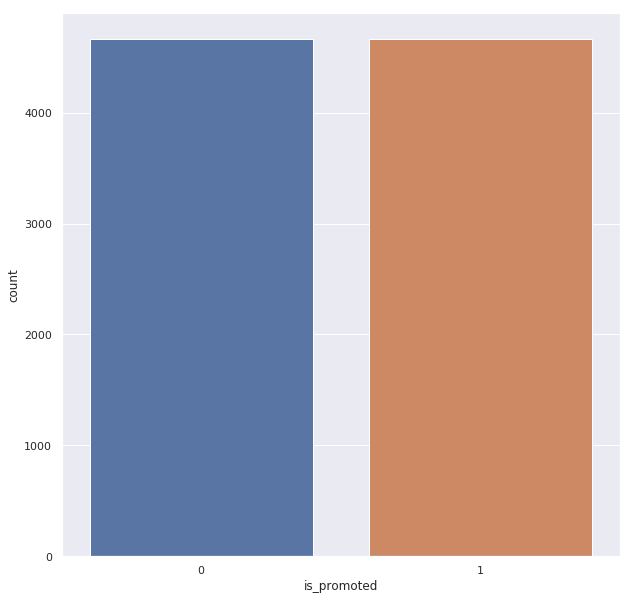

In [328]:
#Let's see the class distribution , now it is equally classified 
ax=sns.countplot(x=target,data=df_hr_corpus_mod)
print(df_hr_corpus_mod.is_promoted.value_counts())

In [329]:
target='is_promoted'
X=df_hr_corpus_mod.loc[:,df_hr_corpus_mod.columns!=target]
Y=df_hr_corpus_mod.loc[:,df_hr_corpus_mod.columns==target]
print("Prepared the label(dependent) and Independent data")
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

Prepared the label(dependent) and Independent data
There are 6255 samples in the training set and 3081 samples in the test set


In [0]:
clfLRC = LogisticRegression().fit(X_train,Y_train) #Instantiate the Logistic Regression classifier and Fit the data
clfRFC = RandomForestClassifier().fit(X_train,Y_train) #Instantiate the Randome Forest classifier and Fit the data
clfDTC = DecisionTreeClassifier().fit(X_train,Y_train) #Instantiate the Decision Tree and Fit the data
clfGBC = GradientBoostingClassifier().fit(X_train,Y_train) #Instantiate the GradientBoostingClassifier and Fit the data
clfABC = AdaBoostClassifier().fit(X_train,Y_train) #Instantiate the AdaBoostClassifier and Fit the data
clfXGB = XGBClassifier().fit(X_train,Y_train) #Instantiate the XGBClassifier and Fit the dat
clfKNN = KNeighborsClassifier().fit(X_train,Y_train) #Instantiate the SVC and Fit the dat
clfSVC = SVC().fit(X_train,Y_train)

In [0]:
Ypred_LRC = clfLRC.predict(X_test)
Ypred_RFC = clfRFC.predict(X_test)
Ypred_DTC = clfDTC.predict(X_test)
Ypred_GBC = clfGBC.predict(X_test)
Ypred_ABC = clfABC.predict(X_test)
Ypred_XGC = clfXGB.predict(X_test)
Ypred_KNN = clfKNN.predict(X_test)
Ypred_SVC = clfSVC.predict(X_test)

In [0]:
model_df=model_df.append(pd.DataFrame({'Model_Name':['With Undersample'],'Accuracy':['-'],'Precision':['-'],'Recall':['-'],'F1_Score':['-'],'roc_score':['-']},))

In [333]:
model_df=model_df.append(get_scores('LogisticRegression',Y_test,Ypred_LRC), ignore_index=True)
model_df=model_df.append(get_scores('RandomForest',Y_test,Ypred_RFC), ignore_index=True)
model_df=model_df.append(get_scores('DecisionTreeClassifier',Y_test,Ypred_DTC), ignore_index=True)
model_df=model_df.append(get_scores('GradientBoostingClassifier',Y_test,Ypred_GBC), ignore_index=True)
model_df=model_df.append(get_scores('AdaBoostClassifier',Y_test,Ypred_ABC), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test,Ypred_XGC), ignore_index=True)
model_df=model_df.append(get_scores('KNeighborsClassifier',Y_test,Ypred_KNN), ignore_index=True)
model_df=model_df.append(get_scores('SVC',Y_test,Ypred_SVC), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
8,With Grid Search,-,-,-,-,-
9,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


In [334]:
#Prepare X and y using pandas
target = 'is_promoted'
X_BefUS      = df_hr_corpus.loc[:,df_hr_corpus.columns!=target]
Y_BefUS      = df_hr_corpus.loc[:,df_hr_corpus.columns==target]
y_BefUS      = df_hr_corpus.is_promoted
print("Prepared the label(dependent) and Independent data")
X_train_BefUS,X_test_BefUS, Y_train_BefUS, Y_test_BefUS = train_test_split(X_BefUS, Y_BefUS, test_size = 0.33, random_state = 42)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train_BefUS.shape[0], X_test_BefUS.shape[0]))

Prepared the label(dependent) and Independent data
There are 6255 samples in the training set and 3081 samples in the test set


In [336]:
model_df=model_df.append(pd.DataFrame({'Model_Name':['With Under Sample & Org. Test Data'],'Accuracy':['-'],'Precision':['-'],'Recall':['-'],'F1_Score':['-'],'roc_score':['-']},))
#clfXGB = XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01,n_jobs=3).fit(X_train,Y_train) #Instantiate the XGBClassifier and Fit the dat
Ypred_GBC_BefUS = clfGBC.predict(X_test_BefUS)
Ypred_XGB_BefUS = clfXGB.predict(X_test_BefUS)
model_df=model_df.append(get_scores('GradientBoostingClassifier',Y_test_BefUS,Ypred_GBC_BefUS), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test_BefUS,Ypred_XGB_BefUS), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
8,With Grid Search,-,-,-,-,-
9,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


In [0]:
#model_df.drop(model_df.index[41],inplace=True)
#model_df.reset_index(inplace=True)
#model_df

<a id=section406></a>
__4.6 Classification Models with UnderSampling & GridsearchCV__<br>

In [0]:
clfLR = LogisticRegression(penalty="l1",C=0.5,n_jobs=3).fit(X_train,Y_train) #Instantiate the Logistic Regression classifier and Fit the data
clfRF = RandomForestClassifier(n_estimators=250,max_depth= 9, max_leaf_nodes=110, min_samples_leaf= 1, min_samples_split= 2,random_state=0,n_jobs=3).fit(X_train,Y_train) #Instantiate the Randome Forest classifier and Fit the data
clfDT = DecisionTreeClassifier(max_depth= 9, max_leaf_nodes= 70, min_samples_leaf= 3, min_samples_split= 2).fit(X_train,Y_train) #Instantiate the Decision Tree and Fit the data
clfXGB = XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01,n_jobs=3).fit(X_train,Y_train) #Instantiate the XGBClassifier and Fit the dat
clfKNN = KNeighborsClassifier(n_neighbors=30,p=1,weights='distance',n_jobs=3).fit(X_train,Y_train) #Instantiate the SVC and Fit the dat
clfSVC = SVC(kernel='rbf', gamma=0.001, C=0.01,random_state=0).fit(X_train,Y_train)


In [0]:
Ypred_LRC = clfLRC.predict(X_test)
Ypred_RFC = clfRFC.predict(X_test)
Ypred_DTC = clfDTC.predict(X_test)
Ypred_XGB = clfXGB.predict(X_test)
Ypred_KNN = clfKNN.predict(X_test)
Ypred_SVC = clfSVC.predict(X_test)

In [0]:
model_df=model_df.append(pd.DataFrame({'Model_Name':['With Undersample & GS'],'Accuracy':['-'],'Precision':['-'],'Recall':['-'],'F1_Score':['-'],'roc_score':['-']},))

In [340]:
model_df=model_df.append(get_scores('LogisticRegression',Y_test,Ypred_LRC), ignore_index=True)
model_df=model_df.append(get_scores('RandomForest',Y_test,Ypred_RFC), ignore_index=True)
model_df=model_df.append(get_scores('DecisionTreeClassifier',Y_test,Ypred_DTC), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test,Ypred_XGB), ignore_index=True)
model_df=model_df.append(get_scores('KNeighborsClassifier',Y_test,Ypred_KNN), ignore_index=True)
model_df=model_df.append(get_scores('SVC',Y_test,Ypred_SVC), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
8,With Grid Search,-,-,-,-,-
9,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


In [341]:
model_df=model_df.append(pd.DataFrame({'Model_Name':['With Under Sample & Org. Test Data'],'Accuracy':['-'],'Precision':['-'],'Recall':['-'],'F1_Score':['-'],'roc_score':['-']},))
#clfXGB = XGBClassifier(max_depth=9, n_estimators=450, learning_rate=0.01,n_jobs=3).fit(X_train,Y_train) #Instantiate the XGBClassifier and Fit the dat
Ypred_GBC_BefUS = clfGBC.predict(X_test_BefUS)
Ypred_XGB_BefUS = clfXGB.predict(X_test_BefUS)
model_df=model_df.append(get_scores('GradientBoostingClassifier',Y_test_BefUS,Ypred_GBC_BefUS), ignore_index=True)
model_df=model_df.append(get_scores('XGBClassifier',Y_test_BefUS,Ypred_XGB_BefUS), ignore_index=True)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
0,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
1,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
2,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
3,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
4,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
5,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
6,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
7,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
8,With Grid Search,-,-,-,-,-
9,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


In [342]:
model_df.index = np.arange(1, len(model_df) + 1)
model_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,roc_score
1,LogisticRegression,0.920993,0.631579,0.07327,0.544961,0.534739
2,RandomForest,0.935866,0.742284,0.326323,0.70964,0.658135
3,DecisionTreeClassifier,0.903854,0.420801,0.477612,0.697378,0.709642
4,GradientBoostingClassifier,0.944435,0.958904,0.332429,0.732154,0.665582
5,AdaBoostClassifier,0.928899,0.783133,0.176391,0.625255,0.586028
6,XGBClassifier,0.941671,0.954447,0.298507,0.711984,0.648622
7,KNeighborsClassifier,0.930558,0.75,0.221845,0.652876,0.607642
8,SVC,0.936363,0.928382,0.237449,0.67232,0.617912
9,With Grid Search,-,-,-,-,-
10,LogisticRegression,0.920993,0.630058,0.0739484,0.545487,0.535048


In [0]:
# DF TO EXCEL
from pandas import ExcelWriter

#writer = ExcelWriter('PythonExport.xlsx')
#yourdf.to_excel(writer,'Sheet5')
#writer.save()

# DF TO CSV
model_df.to_csv('PythonExport.csv', sep=',')

In [0]:
#model_df

In [0]:
def confusion_matrix_model(model_used,y_test1,x_test1):
    cm=confusion_matrix(y_test1,model_used.predict(x_test1))
    col=["Predicted Promoted","Predicted No Promotion"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Promoted","Predicted No Promotion"]
    cm.index=["Actual Promoted","Actual No Promotion"]
    return cm.T

def importance_of_features(model,x_train1):
    features = pd.DataFrame()
    features['feature'] = x_train1.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(6,6))

In [349]:
print(confusion_matrix_model(clfGBC,Y_test,X_test))
print(confusion_matrix_model(clfXGB,Y_test,X_test))

                        Actual Promoted  Actual No Promotion
Predicted Promoted                 1079                   78
Predicted No Promotion              446                 1478
                        Actual Promoted  Actual No Promotion
Predicted Promoted                 1107                  100
Predicted No Promotion              418                 1456


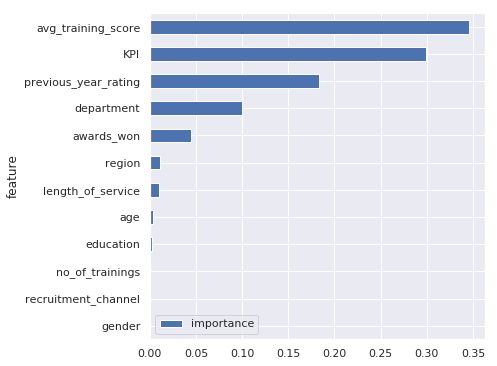

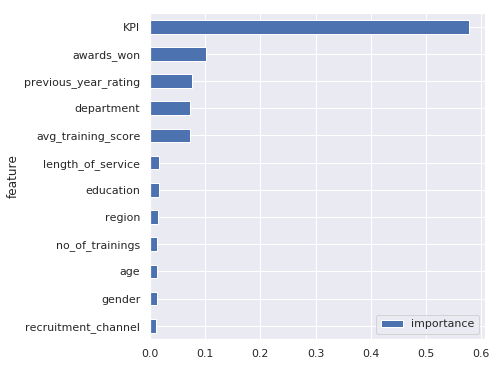

In [352]:
importance_of_features(clfGBC,X_train)
importance_of_features(clfXGB,X_train)

<a id=section5></a>
__5.0 Conclusion__<br>

- Since data set is imbalanced, we preferred to use F1 score & Recall rather than accuracy to measure the Model

- The Model GradientBoostingClassifier with Under sample is providing good F1 & Recall Score, but the F1 Score reduced little bit when tested on non under sampled test data set

- The Model XGBClassifier without hyper parameters & Under sampling is providing better F1 Score 0.91581 and also better recall 0.824987 among all

- Either of above two models can be used for promotion prediction depending on business requirement 

- Top five features are KPI, awards_won, previous_year_rating, department and avg_training_score which contributes for prediction